In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import tensorflow_hub as hub

In [0]:
style_path = '/content/content11.jpg'
content_path = '/content/IMG-20190902-WA0012.jpg'

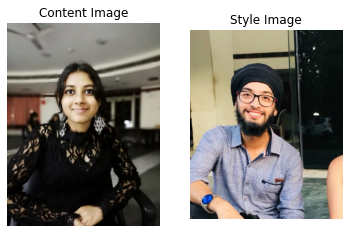

In [42]:

content_image = plt.imread(content_path)
style_image = plt.imread(style_path)

plt.subplot(1, 2, 1)
plt.title('Content Image')
plt.axis('off')
plt.imshow(content_image)

plt.subplot(1, 2, 2)
plt.title('Style Image')
plt.axis('off')
plt.imshow(style_image)

def image_to_tensor(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3, dtype=tf.float32)
    
    # Resize the image to specific dimensions
    img = tf.image.resize(img, [720, 512])
    img = img[tf.newaxis, :]
    return img

def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    tensor = tensor[0]
    plt.figure(figsize=(20,10))
    plt.axis('off')
    return plt.imshow(tensor)



In [0]:

hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


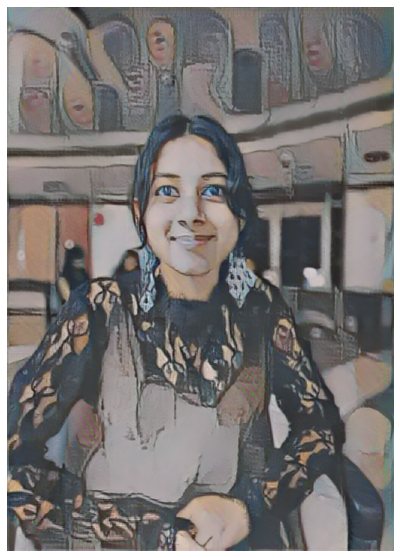

In [46]:

content_image_tensor = image_to_tensor(content_path)
style_image_tensor = image_to_tensor(style_path)


combined_result = hub_module(tf.constant(content_image_tensor), tf.constant(style_image_tensor))[0]
tensor_to_image(combined_result)
